https://kneed.readthedocs.io/en/stable/index.html

In [1]:
# Instalacion del paquete Kneed
! pip install kneed

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt 
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import seaborn as sns
import warnings
import numpy as np

# Omite Warnings 
warnings.simplefilter("ignore")

# Configuracion Entorno Plot
sns.set(rc={'figure.figsize':(5.27,5.27)})

In [3]:
# Simulo Datos para poder Visualizar y luego aplicar DBSCAN
centers = [[1, 0.5],[2, 2],[1, -1]]
stds    = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples = 1000, centers = centers, cluster_std = stds, random_state = 0)

In [4]:
X

array([[ 0.8951447 ,  0.35799821],
       [ 1.17640523,  0.54001572],
       [ 0.85126135, -0.63502669],
       ...,
       [ 2.24284467,  1.58073184],
       [ 2.65263897,  2.15110367],
       [ 0.70827913, -0.59613368]])

In [5]:
labels_true

array([0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 0,
       2, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0,
       1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0,
       2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0,
       1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2,
       2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 1,

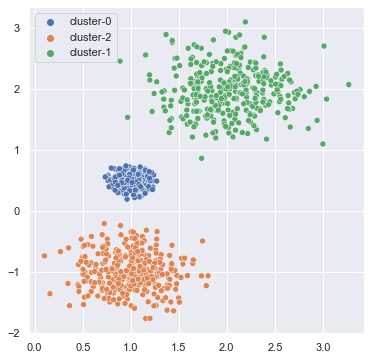

In [6]:
# Scatterplot de los Cluster simulados
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(X[:,0], X[:,1], hue = ["cluster-{}".format(x) for x in labels_true])
plt.show()

In [7]:
# Aplico DBSCAN con eps = 0.5 y minpts = 10
db = DBSCAN(eps = 0.5, min_samples = 10).fit(X)
labels = db.labels_

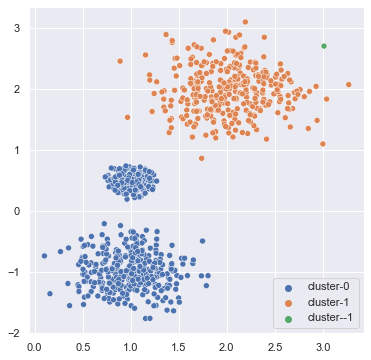

In [8]:
# Visualizo Scatterplot de los datos generados con las etiquetas entrenadas con DBSCAN
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(X[:,0], X[:,1], hue = ["cluster-{}".format(x) for x in labels])
plt.show()

###  **Tuneo del parámetro $\epsilon$**

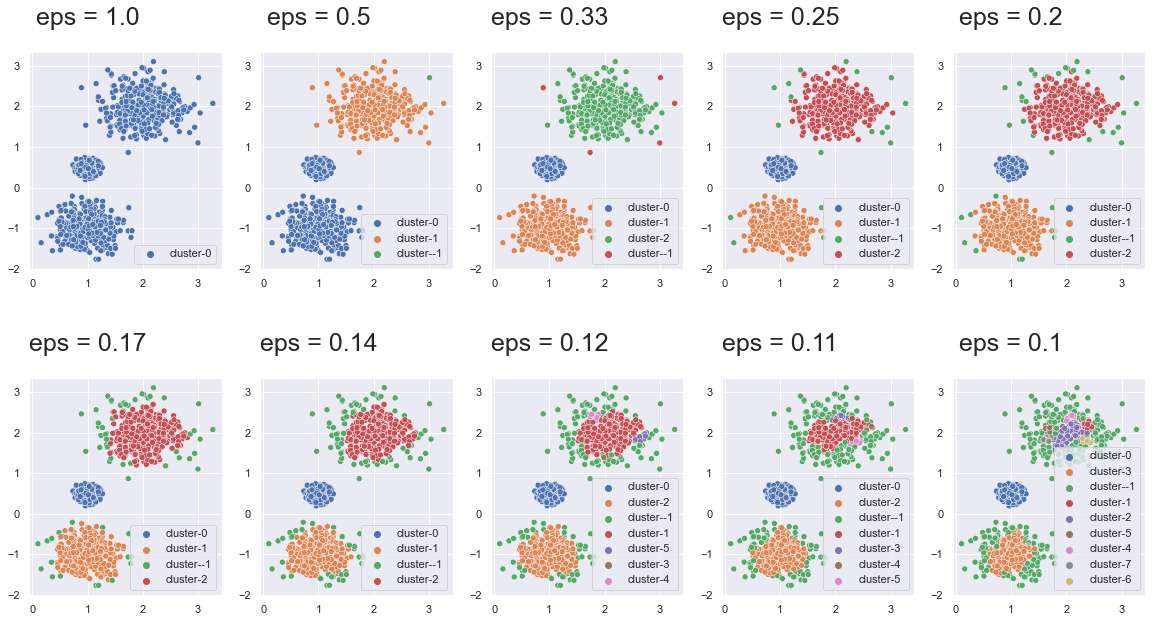

In [9]:
# Genero Multiples Scatterplot con distintos eps
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace = 0.5, wspace = 0.2)
i = 1 

for x in range(10, 0, -1):
    eps = 1/(11-x)
    db  = DBSCAN(eps = eps, min_samples = 10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True 
    labels  = db.labels_ 
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize = 25, ha = "center")
    sns.scatterplot(X[:, 0], X[:, 1], hue = ["cluster-{}".format(x) for x in labels])
    i += 1

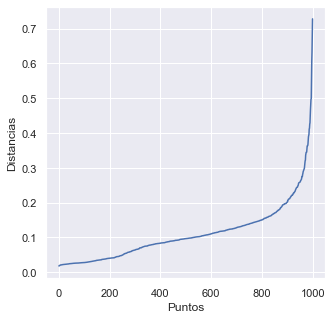

In [10]:
# Entreno un KNN para encontrar el eps optimo
nearest_neighbors = NearestNeighbors(n_neighbors = 11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:, 10], axis = 0)
plt.figure(figsize = (5, 5))
plt.plot(distances)
plt.xlabel("Puntos")
plt.ylabel("Distancias")
plt.show()

# Sin embargo, la visualizacion no dice mucho porque no entrega
# un punto, sino un posible rango de valores para eps.

<Figure size 360x360 with 0 Axes>

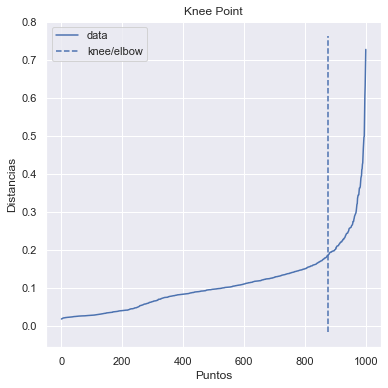

In [11]:
# Para encontrar eps optimo, se utilizara el paquete kneed
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction = 'increasing', interp_method = 'polynomial')
plt.figure(figsize = (5, 5))
knee.plot_knee()
plt.xlabel("Puntos")
plt.ylabel("Distancias")
plt.show()

In [ ]:
# Epsilon Optimo
distances[knee.knee]

0.18723454491446345

In [12]:
# Aplico DBSCAN con eps optimo y minpts = 10
db = DBSCAN(eps = distances[knee.knee], min_samples = 10).fit(X)
labels = db.labels_

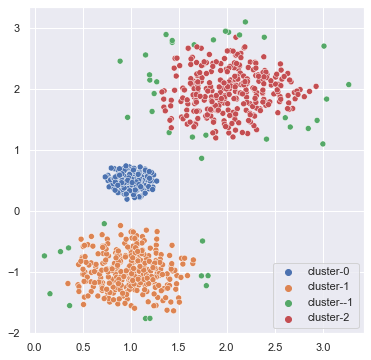

In [13]:
# Visualizo Scatterplot de los datos generados con las etiquetas entrenadas con DBSCAN
fig = plt.figure(figsize = (6, 6))
sns.scatterplot(X[:,0], X[:,1], hue = ["cluster-{}".format(x) for x in labels])
plt.show()